# The Data Pipeline

This notebook illustrates all the data processing steps that are necessary to process the data.



# 1 Weather Data

In [1]:
from energy_forecast.meteo import ArpegeSimpleAPI

/home/antoine/.local/share/hatch/env/virtual/energy-forecast/Jk97fpOc/energy-forecast/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
my_arpege = ArpegeSimpleAPI()
deps_wind = my_arpege.departement_wind()
deps_sun = my_arpege.departement_sun()

<Axes: >

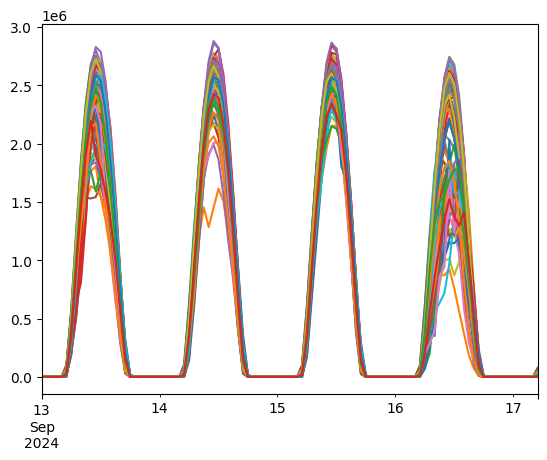

In [3]:
deps_sun.plot(legend=False)

# Get the trained model

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from energy_forecast import ROOT_DIR
from energy_forecast.enr_production_model import ENRProductionModel
my_model = ENRProductionModel.load(filename="model_departements.pkl")
my_model

# Run the prediction

In [6]:
deps_sun.shape

(102, 94)

In [7]:
prediction = my_model.predict(sun_flux=deps_sun, wind_speed=deps_wind)


In [9]:
prediction

,wind,sun
2024-09-13 00:00:00,2615.188550,2.371010e-13
2024-09-13 01:00:00,2656.317190,2.370905e-13
2024-09-13 02:00:00,2726.378180,1.735739e-13
2024-09-13 03:00:00,2721.084414,2.159988e-13
2024-09-13 04:00:00,2585.996102,2.163299e-13
...,...,...
2024-09-17 02:00:00,5204.701054,0.000000e+00
2024-09-17 03:00:00,5361.000728,0.000000e+00
2024-09-17 04:00:00,5673.163252,4.330587e-02
2024-09-17 05:00:00,5940.026724,4.007112e+01


<Axes: >

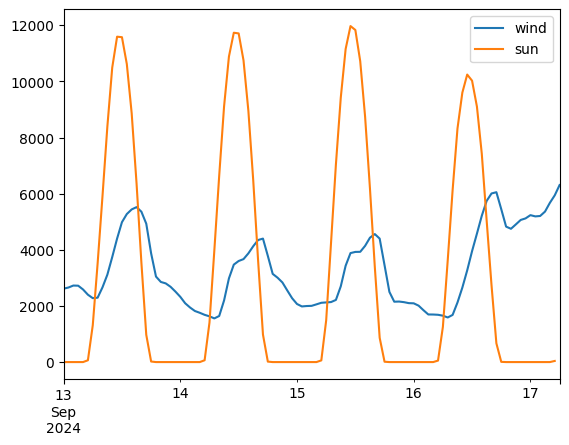

In [8]:
prediction.plot()